In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:

df=pd.read_csv("MNIST.csv")
from sklearn.model_selection import train_test_split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.1,random_state=2)

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_cv.shape)
print(y_cv.shape)

(34020, 784)
(4200, 784)
(34020,)
(4200,)
(3780, 784)
(3780,)


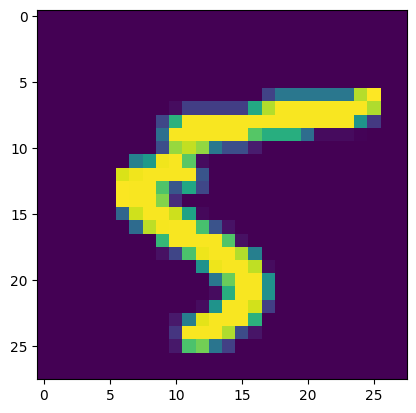

In [4]:
plt.imshow(X_train[0].reshape(28,28))

In [5]:
X_train = X_train/255
X_test = X_test/255

In [22]:
#SVM
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
print(f'train acc-{accuracy_score(y_train, y_pred_train)}')

y_pred_cv = classifier.predict(X_cv)
print(f'cv acc-{accuracy_score(y_cv, y_pred_cv)}')

y_pred_test = classifier.predict(X_test)
print(f'test acc-{accuracy_score(y_test, y_pred_test)}')

train acc-0.9887419165196943
cv acc-0.09814814814814815
test acc-0.9733333333333334


In [7]:
#ANN

model1 = Sequential()

#model1.add(Flatten(input_shape=(28,28),name='L1'))
model1.add(keras.Input(shape=(784,)))
model1.add(Dense(128,activation='relu',name='L2'))
model1.add(Dense(10,activation='softmax',name='L3'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L2 (Dense)                  (None, 128)               100480    
                                                                 
 L3 (Dense)                  (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model1.fit(X_train,y_train,epochs=10,verbose=0)

In [10]:
y_prob1 = model1.predict(X_train)
y_pred1 = y_prob1.argmax(axis=1)
print(f'train acc: {accuracy_score(y_train,y_pred1)}')

y_prob1 = model1.predict(X_cv)
y_pred1 = y_prob1.argmax(axis=1)
print(f'cv acc: {accuracy_score(y_cv,y_pred1)}')

1064/1064 [==============================] - 2s 2ms/step
train acc: 0.9966784244562022
119/119 [==============================] - 0s 2ms/step
cv acc: 0.9719576719576719


In [11]:
#now try to optimize it by using logits and linear in output layer

In [12]:
model2 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(128, activation = 'relu',name='L2'),
        Dense(10, activation = 'linear',name='L3')
    ]
)

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001))

model2.fit(X_train,y_train,epochs=250,verbose=0)

In [13]:
y_prob2 = model2.predict(X_train)
y_prob2 = tf.nn.softmax(y_prob2).numpy()
y_pred2 = y_prob2.argmax(axis=1)
print(f'train acc: {accuracy_score(y_train,y_pred2)}') #little bit better

y_prob2 = model2.predict(X_cv)
y_prob2 = tf.nn.softmax(y_prob2).numpy()
y_pred2 = y_prob2.argmax(axis=1)
print(f'cv acc: {accuracy_score(y_cv,y_pred2)}')

1064/1064 [==============================] - 2s 2ms/step
train acc: 1.0
119/119 [==============================] - 0s 2ms/step
cv acc: 0.9761904761904762


In [14]:
#trying different architechture to improve accuracy

In [15]:
train_acc_list = []
cv_acc_list = []



model1 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(25, activation='relu', name = 'L2'),
        Dense(15, activation='relu', name = 'L3'),
        Dense(10, activation='linear', name = 'L4')
     ]
)

model2 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(128, activation='relu', name = 'L2'),
        Dense(32, activation='relu', name = 'L3'),
        Dense(10, activation='linear', name = 'L4')
     ]
)

model3 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(65, activation='relu', name = 'L2'),
        Dense(32, activation='relu', name = 'L3'),
        Dense(32, activation='relu', name = 'L4'),
        Dense(20, activation='relu', name = 'L5'),
        Dense(10, activation='linear', name = 'L6')
     ]
)
model4 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(32, activation='relu', name = 'L2'),
        Dense(16, activation='relu', name = 'L3'),
        Dense(16, activation='relu', name = 'L4'),
        Dense(16, activation='relu', name = 'L5'),
        Dense(12, activation='relu', name = 'L6'),
        Dense(10, activation='linear', name = 'L7')
     ]
)


nn_models = [model1,model2,model3,model4]

for model in nn_models:

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001))

    print(f"Training {model.name}")
    model.fit(X_train, y_train,epochs=100,verbose=0)

    print("Done\n")
    yhat = model.predict(X_train)
    y_prob = tf.nn.softmax(yhat).numpy()
    y_pred = y_prob.argmax(axis=1)
    train_acc = accuracy_score(y_train,y_pred)
    train_acc_list.append(train_acc)


    yhat = model.predict(X_cv)
    y_prob = tf.nn.softmax(yhat).numpy()
    y_pred = y_prob.argmax(axis=1)
    cv_acc = accuracy_score(y_cv,y_pred)
    cv_acc_list.append(cv_acc)


print("RESULTS----------------------------------------------------------------------------------")
for model_num in range(len(train_acc_list)):
    print(
        f"Model {model_num+1}: Training Accuracy: {train_acc_list[model_num]:.2f}, " +
        f"CV MSE: {cv_acc_list[model_num]:.2f}"
        )

Training sequential_2
Done

119/119 [==============================] - 0s 2ms/step
Training sequential_3
Done

119/119 [==============================] - 0s 2ms/step
Training sequential_4
Done

119/119 [==============================] - 0s 2ms/step
Training sequential_5
Done

119/119 [==============================] - 0s 1ms/step
RESULTS----------------------------------------------------------------------------------
Model 1: Training Accuracy: 0.99, CV MSE: 0.95
Model 2: Training Accuracy: 1.00, CV MSE: 0.98
Model 3: Training Accuracy: 1.00, CV MSE: 0.97
Model 4: Training Accuracy: 1.00, CV MSE: 0.95


In [16]:
# test accuracy

model_num = 2

yhat = nn_models[model_num].predict(X_test)
y_prob = tf.nn.softmax(yhat).numpy()
y_pred = y_prob.argmax(axis=1)
test_acc = accuracy_score(y_test,y_pred)

print(f"Model- {model_num}")
print(f"Training accuracy- {train_acc_list[model_num-1]:.4f}")
print(f"CV acccuracy {cv_acc_list[model_num-1]:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

132/132 [==============================] - 0s 2ms/step
Model- 2
Training accuracy- 1.0000
CV acccuracy 0.9765
Test accuracy: 0.9740


In [23]:
#regularization
model3 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(128, activation='relu', name = 'L2',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        Dense(32, activation='relu', name = 'L3',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        Dense(10, activation='linear', name = 'L4',kernel_regularizer=tf.keras.regularizers.L2(0.01))
     ]
)
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam',metrics=['accuracy'])

history=model3.fit(X_train,y_train,epochs=100,verbose=0)

In [24]:
y_hat = model3.predict(X_train)
y_prob = tf.nn.softmax(y_hat).numpy()
y_pred = y_prob.argmax(axis=1)
print(f'train acc: {accuracy_score(y_train,y_pred)}')

y_hat = model3.predict(X_cv)
y_prob = tf.nn.softmax(y_hat).numpy()
y_pred = y_prob.argmax(axis=1)
print(f'cv acc: {accuracy_score(y_cv,y_pred)}')

1064/1064 [==============================] - 2s 2ms/step
train acc: 0.9185773074661964
119/119 [==============================] - 0s 2ms/step
cv acc: 0.8235449735449736


In [25]:
model4 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(784,)),
        Dense(25, activation='relu', name = 'L3'),
        Dense(10, activation='softmax', name = 'L4')
     ]
)
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='Adam',metrics=['accuracy'])

history=model4.fit(X_train,y_train,epochs=250,verbose=0)

In [26]:
y_hat = model4.predict(X_train)
y_pred = y_hat.argmax(axis=1)
print(f'train acc: {accuracy_score(y_train,y_pred)}')

y_hat = model4.predict(X_cv)
y_pred = y_hat.argmax(axis=1)
print(f'cv acc: {accuracy_score(y_cv,y_pred)}')

1064/1064 [==============================] - 1s 1ms/step
train acc: 0.9984714873603763
119/119 [==============================] - 0s 2ms/step
cv acc: 0.9494708994708995


In [ ]:
#

In [27]:
# now trying with features that are important

(42000, 784)
(42000,)


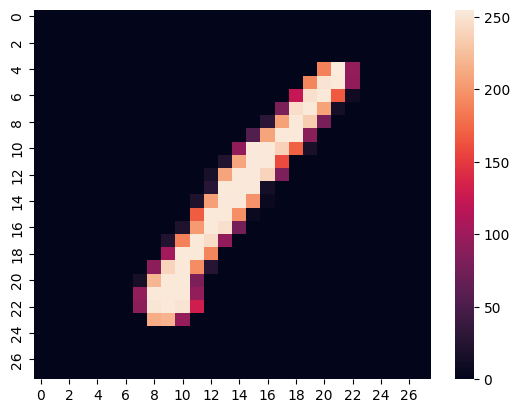

In [31]:
df=pd.read_csv("MNIST.csv")
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
print(X.shape)
print(y.shape)
sns.heatmap(X[0].reshape(28,28))
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)
imp=rf.feature_importances_
bool_arr=list()
for i in range(len(imp)):
    if imp[i]==0:
        bool_arr.append(False)
    else:
        bool_arr.append(True)
X_new=X[:,bool_arr]


In [39]:
print(X_new.shape)
print(y.shape)
X_new=X_new/255

X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.1,random_state=2)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.1,random_state=2)

(42000, 659)
(42000,)


In [40]:
model5 = Sequential(
    [
        #Flatten(input_shape=(28,28),name='L1'),
        keras.Input(shape=(659,)),
        Dense(128, activation = 'relu',name='L2'),
        Dense(10, activation = 'linear',name='L3')
    ]
)

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001))

model5.fit(X_train,y_train,epochs=250,verbose=0)

y_prob5 = model5.predict(X_train)
y_prob5 = tf.nn.softmax(y_prob5).numpy()
y_pred5 = y_prob5.argmax(axis=1)
print(f'train acc: {accuracy_score(y_train,y_pred5)}') #little bit better

y_prob5 = model5.predict(X_cv)
y_prob5 = tf.nn.softmax(y_prob5).numpy()
y_pred5 = y_prob5.argmax(axis=1)
print(f'cv acc: {accuracy_score(y_cv,y_pred5)}')

1064/1064 [==============================] - 2s 2ms/step
train acc: 1.0
119/119 [==============================] - 0s 2ms/step
cv acc: 0.976984126984127


In [42]:
y_prob5 = model5.predict(X_test)
y_prob5 = tf.nn.softmax(y_prob5).numpy()
y_pred5 = y_prob5.argmax(axis=1)
print(f'test acc: {accuracy_score(y_test,y_pred5)}')

132/132 [==============================] - 0s 3ms/step
test acc: 0.9783333333333334
